# Assignment 2

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib.colors as mplcolors
from tqdm import tqdm
from torch.utils.data import DataLoader
from tabulate import tabulate

# 1. Load data (MNIST)

* **Q1: 1 point**

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
def load_mnist(data_dir, train, download, transform):
    data = None
    #########################################################################
    # TODO: Implement a data loading function. Load MNIST dataset using     #
    # torchvision.datasets and store the dataset in data varaible.          #
    #########################################################################
    # ******** START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ******** #

    data=torchvision.datasets.MNIST(root=data_dir,train=train,download=download,transform=transform)

    # ********* END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ********* #
    return data

In [4]:
transform = transforms.Compose([transforms.ToTensor()])
train_data = load_mnist(data_dir='/content/drive/MyDrive/ICE3050/dataset', train=True, download=True, transform=transform)
test_data = load_mnist(data_dir='/content/drive/MyDrive/ICE3050/dataset', train=False, download=True, transform=transform)

# 2. Data statistics

* **Q2: 2 points (0.5 each)**

In [5]:
def print_data_stats(data):
    ##########################################################################
    # TODO: Implement a function that prints statistics of the data. The     #
    # statistics MUST include (1) the number of images, (2) the size of each #
    # image, (3) means and standard deviations of images, and (4) the number #
    # of images per each class. Note that you can use any libraries you want #
    # (numpy, pandas, etc), and the print format is not necessarily the same #
    # as the example shown in the cell below.                                #
    ##########################################################################
    # ******** START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ********* #

    # TODO: (1) the number of images
    n_data=len(data)

    # TODO: (2) img size
    size='x'.join(map(str,data.data.shape[1:]))

    # TODO: (3) mean and std of images
    data.data = data.data.type(torch.DoubleTensor)
    mean=torch.mean(data.data)
    std=torch.std(data.data,dim=(0,1,2))
    ms = f'{mean:.2f} ({std:.2f})'

    # TODO: (4) the number of images per class
    _,n_img=np.unique(data.targets,return_counts=True)
    n_img_per_class = ', '.join([f'{i}: {n:4d}' for i, n in enumerate(n_img)])

    # TODO: print
    data_stats = [ n_data, size, ms, n_img_per_class],
    print(tabulate(data_stats,headers=['n img','img size','mean & std','n img per class']))
    # ********* END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ********** #

In [6]:
print_data_stats(train_data)

  n img  img size    mean & std     n img per class
-------  ----------  -------------  ----------------------------------------------------------------------------------------
  60000  28x28       33.32 (78.57)  0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949


* **Q3: 1 point**

In [7]:
def random_indices(n_class, labels):
    indices = []
    for i in range(n_class):
        idx = np.where(labels == i)[0]
        idx_selected = np.random.choice(idx, size=3)
        indices.append(idx_selected)
    return np.array(indices).T

def plot_random_images(images, labels, n_class):
    #########################################################################
    # TODO: Implement a function that plots 3 random images per class.      #
    #########################################################################
    # ******** START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ******** #

    indices = random_indices(n_class, np.array(labels))

    # nrow & ncol of figure
    nrow, ncol = indices.shape

    # plot
    fig, axs = plt.subplots(nrow, ncol, figsize=(15, 5), constrained_layout=True)
    for i in range(nrow):
        for j in range(ncol):
            img = images[indices[i][j]]
            axs[i][j].imshow(img, vmin=0, vmax=255,cmap='gray')
            axs[i][j].set_xticks([])
            axs[i][j].set_yticks([])
    
    # ********* END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ********* #

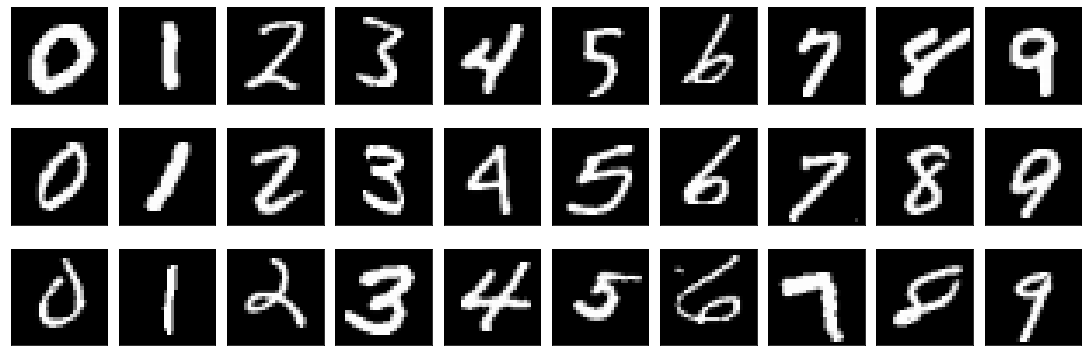

In [8]:
plot_random_images(train_data.data, train_data.targets, n_class=10)

# 3. Building CNN in PyTorch

* **Q4: 2 points**

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        #########################################################################################
        # TODO: Implement __init__() function. Create a convolutional neural net using pytorch  #
        # nn.Module. The CNN architecture is as follows:                                        #
        #     [Layer1] -> Conv layer (in_channels=1, out_channels=6, kernel=5, stride=1)        #
        #     [Layer2] -> ReLU layer                                                            #
        #     [Layer3] -> MaxPool layer (kernel=2, stride=2)                                    #
        #     [Layer4] -> Conv layer (in_channels=6, out_channels=16, kernel=2, stride=1)       #
        #     [Layer5] -> ReLU layer                                                            #
        #     [Layer6] -> MaxPool layer (kernel=2, stride=2)                                    #
        #     [Layer7] -> Flatten layer                                                         #
        #     [Layer8] -> Linear layer (in_features=400, out_features=120)                      #
        #     [Layer9] -> ReLU layer                                                            #
        #     [Layer10] -> Linear layer (in_features=120, out_features=84)                      #
        #     [Layer11] -> ReLU layer                                                           #
        #     [Layer12] -> Linear layer (in_features=84, out_features=10)                       #
        #########################################################################################
        # **************** START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) **************** #
        
        super(CNN, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=2, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(in_features=400, out_features=120),
            nn.ReLU(),
            nn.Linear(in_features=120, out_features=84),
            nn.ReLU(),
            nn.Linear(in_features=84, out_features=10)
        )

        # ***************** END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ***************** #
    
    def forward(self, x):
        return self.net(x)

# 4. Main function


* **Q5: 4 points (0.5 point for each from (1) to (4), 2 points for (5))**

In [56]:
def train(train_data, test_data, epochs, batch_size, lr):
    # set seed
    torch.manual_seed(0)

    # set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    #################################################################################
    # TODO: Implement a training function. You MUST implement all of the following: #
    #       (1) Load dataset (both train and test data) into pytorch DataLoader.    #
    #           Set shuffle argument True for train data and False for test data.   #
    #       (2) Instantiate a CNN model and ship to a device.                       #
    #           Please use the device variable above.                               #
    #       (3) Instantiate a sgd optimizer.                                        #
    #       (4) Instantiate a cross-entropy loss function.                          #
    #       (5) Implement one_step function (see the function below for details).   #
    #################################################################################
    # ************ START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ************ #

    # TODO: (1) load dataset into dataloader
    train_loader = DataLoader(train_data, batch_size, shuffle=True, num_workers=2)
    test_loader = DataLoader(test_data, batch_size, shuffle=False, num_workers=2)

    # TODO: (2) instantiate a CNN model and ship to device
    model = CNN().to(device)

    # TODO: (3) instantiate a sgd optimizer
    optim = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)

    # TODO: (4) instantiate a cross-entropy loss function
    loss_fn = nn.CrossEntropyLoss()
    
    # eval function
    def calc_accuracy(yhat, y):
        labels = torch.argmax(yhat, dim=1)
        return (labels == y).sum().item() / y.size(0)

    eval_fn = calc_accuracy

    # lists to store training logs
    train_losses, train_accrs = [], []
    test_losses, test_accrs = [], []

    # TODO: (5) Implement one_step function
    def one_step(x, y, is_training):
        ###################################################################################
        # TODO: Implement step function. This function intakes x, y, and is_training and  #
        # returns loss and accuracy. x is the input images and y is the corresponding     #
        # class labels. is_training is a boolean argument indicating if this function is  #
        # called in the training phase or the test phase. Note that it will be used in the#
        # main training loop below. You MUST implement all of the following:              #
        #       (5.1) forward propagation.                                                #
        #       (5.2) compute cross-entropy loss and store the result in loss variable.   #
        #       (5.3) compute accuracy and store the result in accr variable.             #
        #       (5.4) set all gradient tensors to zero.                                   #
        #       (5.5) compute the gradient of all leaf tensors (back propagation).        #
        #       (5.6) update the parameters using the SGD algorithm.                      #
        ###################################################################################
        # ************* START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ************* #
        
        # TODO: (5.1) forward propagation
        yhat=model(x)
        # TODO: (5.2) compute cross-entropy loss
        loss=loss_fn(yhat,y)
        # TODO: (5.3) compute accuracy
        accr=eval_fn(yhat,y)

        if is_training==True:
            # TODO: (5.4) set gradient zero
            optim.zero_grad()
            # TODO: (5.5) compute gradients
            loss.backward()
            # TODO: (5.6) update parameters
            optim.step()

        # ************** END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ************** #
        return loss, accr
    

    # main training loop
    for e in range(epochs):
        train_loss = 0.
        train_accr = 0.
        for i, (x, y) in enumerate(tqdm(train_loader)):
            # ship data to device
            x = x.to(device)
            y = y.to(device)
            # NOTE: here we call the step function
            loss, accr = one_step(x, y, is_training=True)
            # accumulate the loss and accuracy
            train_loss += loss
            train_accr += accr

        # save log
        train_losses.append(train_loss.item()/(i+1))
        train_accrs.append(train_accr/(i+1))

        # validation
        with torch.no_grad():
            test_loss = 0.
            test_accr = 0.
            for i, (x, y) in enumerate(tqdm(test_loader)):
                # ship data to device
                x = x.to(device)
                y = y.to(device)
                loss, accr = one_step(x, y, is_training=False)
                test_loss += loss
                test_accr += accr
            # save log
            test_losses.append(test_loss.item()/(i+1))
            test_accrs.append(test_accr/(i+1))
        
        # print log
        log = f'\nEpoch: {e+1}/{epochs}, ' + \
              f'loss (train): {train_losses[-1]:.4f}, ' + \
              f'accuracy (train): {train_accrs[-1]*100:2.2f}%, ' + \
              f'loss (test): {test_losses[-1]:.4f}, ' + \
              f'accuracy (test): {test_accrs[-1]*100:2.2f}%'
        print(log,"\n")
    
    print('Done.')
    return train_losses, train_accrs, test_losses, test_accrs
    # ************* END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ************* #
            

In [57]:
train_loss, train_accr, test_loss, test_accr = train(train_data, test_data, epochs=5, batch_size=32, lr=1e-2)

100%|██████████| 313/313 [00:02<00:00, 107.00it/s]



Epoch: 1/5, loss (train): 0.3873, accuracy (train): 86.81%, loss (test): 0.0637, accuracy (test): 97.96% 



100%|██████████| 313/313 [00:01<00:00, 169.16it/s]



Epoch: 2/5, loss (train): 0.0717, accuracy (train): 97.77%, loss (test): 0.0527, accuracy (test): 98.26% 



100%|██████████| 313/313 [00:01<00:00, 173.08it/s]



Epoch: 3/5, loss (train): 0.0512, accuracy (train): 98.40%, loss (test): 0.0434, accuracy (test): 98.62% 



100%|██████████| 313/313 [00:01<00:00, 164.33it/s]



Epoch: 4/5, loss (train): 0.0409, accuracy (train): 98.72%, loss (test): 0.0461, accuracy (test): 98.53% 



100%|██████████| 313/313 [00:01<00:00, 178.46it/s]



Epoch: 5/5, loss (train): 0.0343, accuracy (train): 98.93%, loss (test): 0.0355, accuracy (test): 98.83% 

Done.


In [10]:
# unmount drive
drive.flush_and_unmount()